In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-of-a-supermarket/supermarket_sales.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
supermarket = pd.read_csv('/kaggle/input/sales-of-a-supermarket/supermarket_sales.csv')

In [4]:
supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
supermarket.tail(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,1/24/2019,18:10,Ewallet,766.00,4.761905,38.3000,6.0
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
# Check missing values 

missing_values = supermarket.isnull().sum()

In [8]:
missing_values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Summary Statistics

In [15]:
supermarket.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


Data Visualization

In [9]:
supermarket.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Distribution of Total Sales Of Supermarket

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


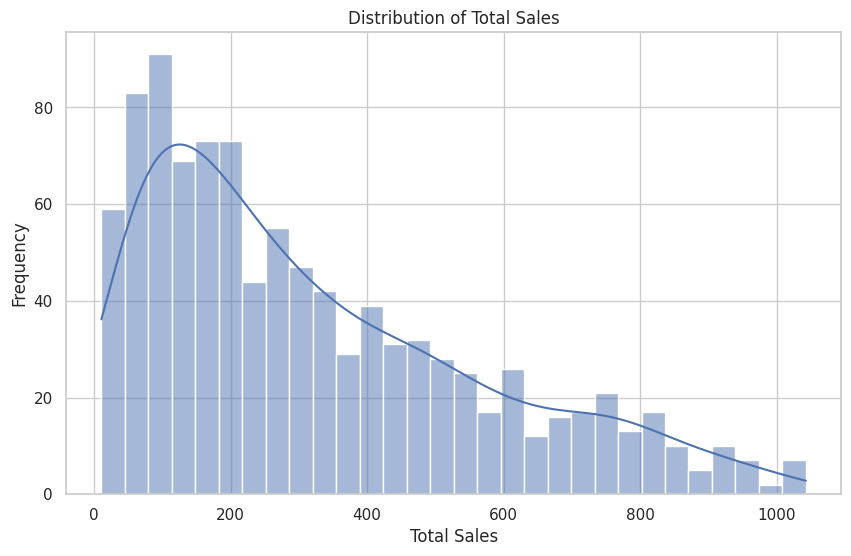

In [10]:
# Setting seaborn style
sns.set(style="whitegrid")

# Distribution of Total Sales

plt.figure(figsize=(10, 6))
sns.histplot(supermarket['Total'], bins=30, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

Sales by Branch

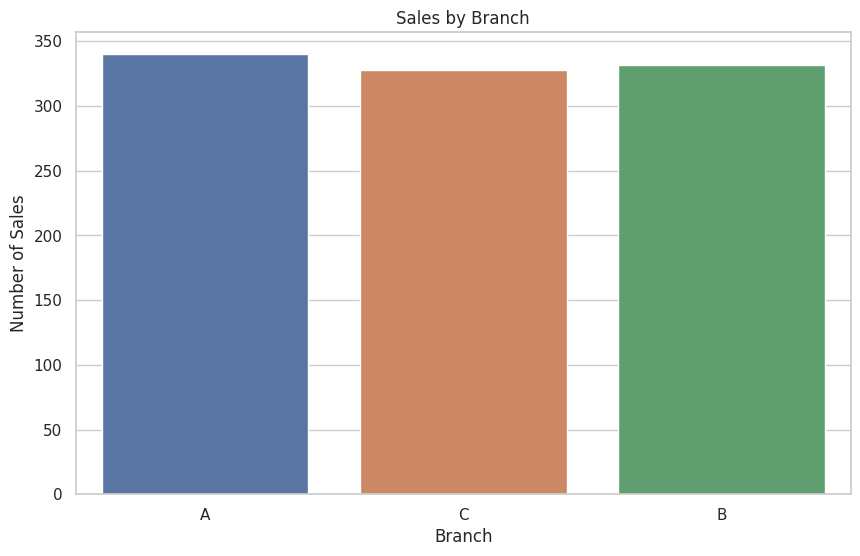

In [11]:
# Sales by Branch

plt.figure(figsize=(10, 6))
sns.countplot(x='Branch', data=supermarket)
plt.title('Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Sales')
plt.show()

Sales by City

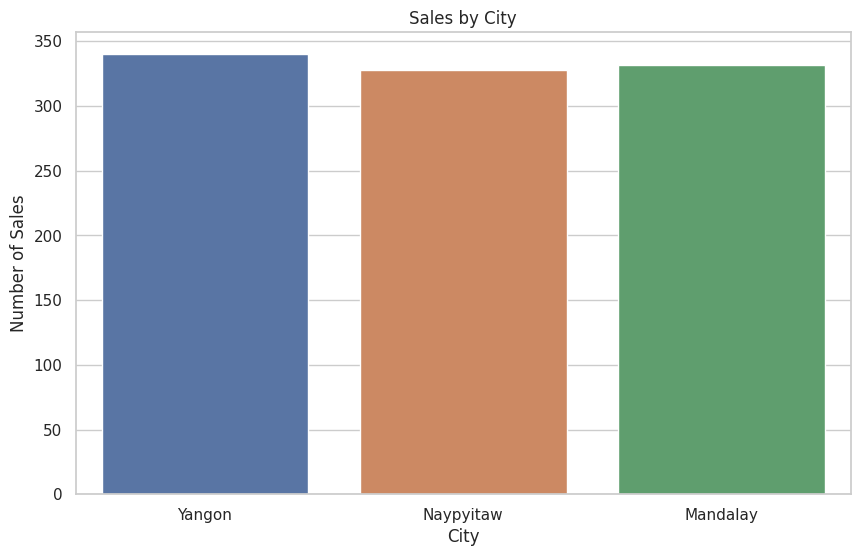

In [12]:
# Sales by City

plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=supermarket)
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Number of Sales')
plt.show()

Sales by Payment Method

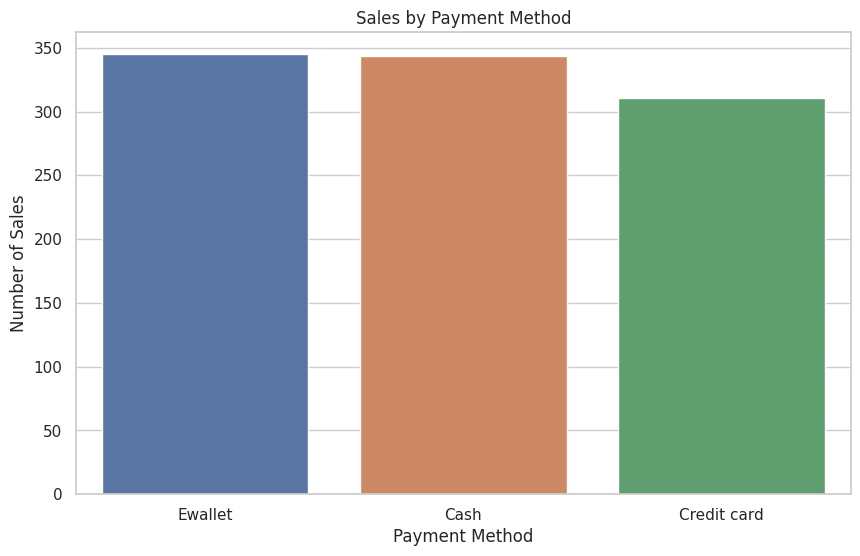

In [13]:
# Sales by Payment Method

plt.figure(figsize=(10, 6))
sns.countplot(x='Payment', data=supermarket)
plt.title('Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Sales')
plt.show()

Average Rating by Product Line

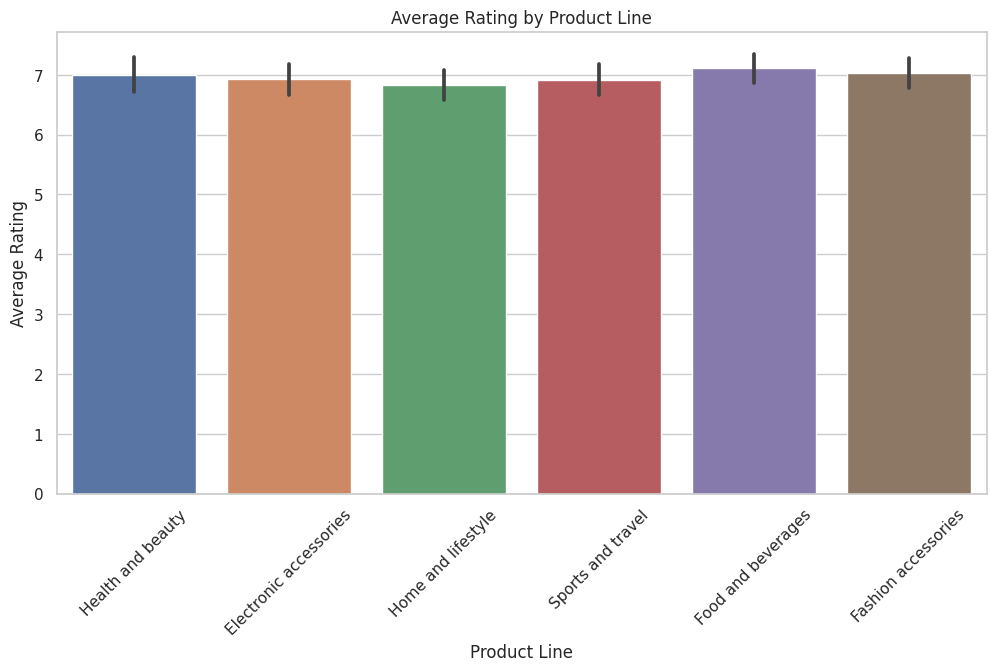

In [14]:
# Average Rating by Product Line

plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Rating', data=supermarket)
plt.title('Average Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

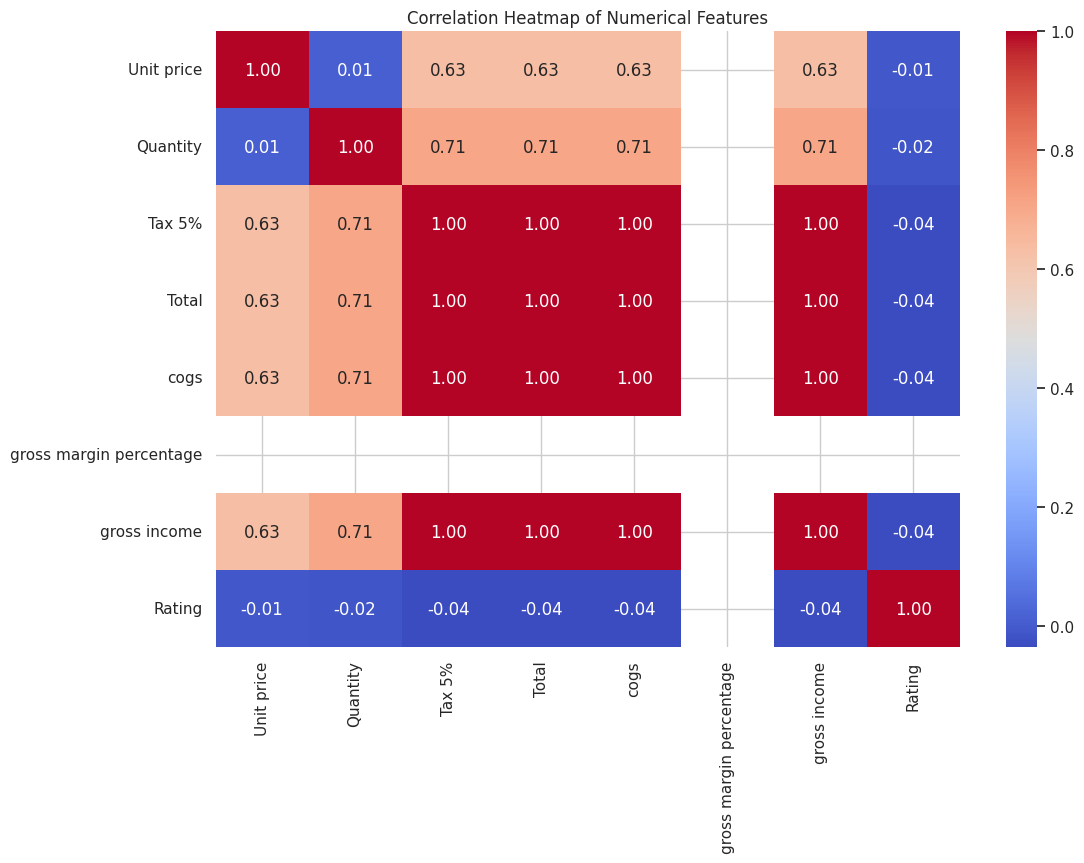

In [16]:
# Selecting numerical features from the dataset
numerical_features = supermarket.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numerical_features.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Preprocessing Data

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical variables
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(supermarket[categorical_columns])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded features with the rest of the dataset, excluding the target variable 'Total'
X = pd.concat([supermarket.drop(columns=['Invoice ID', 'Date', 'Time', 'Total'] + categorical_columns), encoded_features_df], axis=1)
y = supermarket['Total']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((800, 26), (200, 26), (800,), (200,))

From the result above : it have 800 observations in the training set and 200 observations in the testing set, with 26 features used for training.

In [18]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the Total sales on the testing set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the testing set
mse = mean_squared_error(y_test, y_pred)
mse

1.0106128611222592e-26

In [19]:
# Retrieve the coefficients of the Linear Regression model to understand the feature importance

feature_importance = pd.Series(model.coef_, index=X_train.columns)
feature_importance

Unit price                             3.237554e-15
Quantity                               4.884981e-15
Tax 5%                                 5.223881e-02
cogs                                   1.044776e+00
gross margin percentage                0.000000e+00
gross income                           5.223881e-02
Rating                                -7.734787e-16
Branch_A                               2.825162e-17
Branch_B                               3.475952e-16
Branch_C                              -3.748659e-16
City_Mandalay                          3.474326e-16
City_Naypyitaw                        -3.748388e-16
City_Yangon                            2.793150e-17
Customer type_Member                  -9.059848e-16
Customer type_Normal                   9.059103e-16
Gender_Female                          1.417916e-15
Gender_Male                           -1.417943e-15
Product line_Electronic accessories   -7.146790e-16
Product line_Fashion accessories       6.385925e-15
Product line

* The `cogs` (cost of goods sold) has a coefficient of approximately 1.044776, indicating a strong positive impact on the Total sales amount. This is expected as the cost of goods sold directly contributes to the total sales amount.

*  The `Tax 5%` and `gross income` features each have a coefficient of approximately 0.05223881, also indicating a positive impact on the Total sales amount. 